#Análise das concentrações de componentes químicos em um sistema de reatores estacionários:
<p align="justify">Na química, define-se um sistema de reatores como sendo um grupo de recipientes, ligados entre si, onde ocorrem reações de troca de massa e calor. Chamasse um sistema de estacionário quando não há aumento e nem diminuição na massa nos reatores, ou seja, a soma das massas dos reagentes é igual a soma das massas dos produtos.</p>
<p align="justify"> As relações de entrada e saida de reatores podem ser descritas através de equações lineares, o que em casos simples são resolvidos facilmente, mas no mundo real, essas relações podem ser tão complexas que se torna impossivel  analisar-las manualmente. Isso torna a analise computacional uma ferramenta de grande valor para a engenharia química, nesse sentido, este projeto tem como objetivo analisar um sistemas de reatores estacionares e encontrar as concentrações de diversos elementos utilizados e produzidos nos reatores. </p> 

<h3 align="left"> <b> Métodos utilizados: </b> </h3>
<p align="justify"> - Gauss ingênuo; </p>
<p align="justify"> - Gauss ingênuo com pivotamento; </p>
<p align="justify"> - Decomposição lu;</p>
<p align="justify"> - Gauss-Seidel. </p>

<h3 align="left"> <b> Sistema utilizado: </b> </h3>


<figure>
<center>
<img src=' 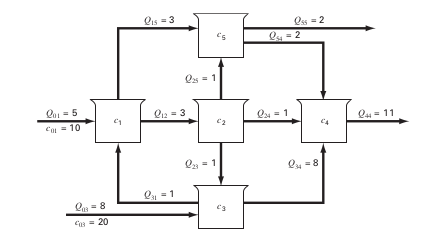'
</figure>
  
<p align="justify">As informações disponiveis para a analise são as vazões de cada tubo de ligação e as concetrações dos primeiros recipientes. Podemos então criar um sistema, utilizando a ideia da conservação da massa de reatores estacionarios, e associar todas essas informações. Abaixo estão todas as equações encontradas: 
</p>

<p align="left"> <b>Reator 1: </b> </p>
$$ q_{0}c_{0} + q_{31}c_{3} = q_{12}c_{1} + q_{15}c_{1}\\
  50+c_3= 3c_1 + 3c_1\\
  -6c_1+c_3=-50
$$
<p align="left"> <b>Reator 2: </b> 
</p>
$$
  q_{12}c_3=q_{25}c_2+q_{24}c_2+q_{23}c_2 \\
3c_1=c_2+c_2+c_2 \\
3c_1-3c_2=0
$$

<p align="left"> <b>Reator 3: </b> </p>
$$
  q_{03}c_0 + q_{23}c_2 = q_{31}c_3 + q_{34}c_3 \\
  160 + c_2 =c_3 + 8c_3 \\
  c_2 - 9c_3 = -160
$$
<p align="left"> <b>Reator 4: </b> </p>
$$ q_{24}c_2 + q_{34}c_3 + q_{54}c_5 = q_{44}c_4 \\
c_2 + 8c_3 + 2c_5 = 11c_4 \\
c_2 + 8c_3 - 11c_4 + 2c_5 =0
$$
<p align="left"> <b>Reator 5: </b> </p>
$$ q_{15}c_{1} + q_{25}c_{2} = q_{55}c_{5} + q_{54}c_{5}\\
  3c_1+c_2= 2c_5 + 2c_5\\
  6c_1+c_2-4c_5=0
$$


<p align="left"> <b> Resultando no sistema:</b> </p>

$$
  \begin{bmatrix}-6c_1+c_3=-50\\
  3c_1-3c_2=0 \\
  c_2 - 9c_3 = -160 \\
  c_2 + 8c_3 - 11c_4 + 2c_5 =0 \\
  3c_1+c_2-4c_5=0\end{bmatrix}
$$

##Funções:



### Teste:

Função que multiplica o resultado obtido pela matriz A e verifica se o vetor resultante se aproximou do vetor B. 

In [ ]:
import numpy as np

def test(ab,x,tol=.1):
  b= ab[:,-1]
  a= ab[:,:-1]
  b_encontrado=np.dot(a,x)
  b_encontrado-=b
  for i in b_encontrado:
    if abs(i)>tol:
      return "Errado!"
  return "Correto!!"

def test_lu(a,b,x,tol=.1):  
  b_encontrado=np.dot(a,x)
  b_encontrado-=b
  for i in b_encontrado:
    if abs(i)>tol:
      return "Errado!"
  return "Correto!!"


###Gauss Ingênuo:

Implementação do método gauss ingênuo.

In [ ]:
def gauss_ingenuo(ab):  
  linhas=ab.shape[0]
  x= np.zeros(linhas)
  for i in range(linhas-1):
    pivo=ab[i,i]
    for j in range(i+1,linhas):
        taxa=ab[j,i]/ab[i,i]
        ab[j,:]-=taxa*ab[i,:]
  for i in range(linhas-1,-1,-1): 
    ab[i,-1]/=ab[i,i]
    x[i]=ab[i,-1]
    ab[i,i]=1.0
    for j in range(i):
      ab[j,-1]-=x[i]*ab[j,i]
      ab[j,i]=0
  return x

### Pivoteamento:

Implementação do método do pivoteamento e de funções auxiliares.

In [ ]:

def pivotear(ab,i):
  indice_pivo=np.argmax(ab[i:,i])+i
  ab[[indice_pivo,i]]=ab[[i,indice_pivo]]
  
def pivoteamento(ab):  
  linhas=ab.shape[0]
  x= np.zeros(linhas)
  for i in range(linhas-1):
    pivotear(ab,i)
    pivo=ab[i,i] 
    for j in range(i+1,linhas):
        taxa=ab[j,i]/ab[i,i]
        ab[j,:]-=taxa*ab[i,:]
  for i in range(linhas-1,-1,-1): 
    ab[i,-1]/=ab[i,i]
    x[i]=ab[i,-1]
    ab[i,i]=1.0
    for j in range(i):
      ab[j,-1]-=x[i]*ab[j,i]
      ab[j,i]=0
  return x

### Gauss-Seidel:

Implementação do método de gauss seidel e de funções auxiliares, como a de calculo de erro.

In [ ]:
def calc_error(x,x_ant):
  error=np.zeros(len(x))
  for i in range(len(x)):
    error[i]=((x[i]-x_ant[i])*100/x[i])
  return error

def gauss_seidel(ab,tol=.001,it_max=100):
  linhas=ab.shape[0]
  error=np.zeros(linhas)
  x=np.zeros(linhas)
  for it in range(it_max):
    x_ant=x.copy()
    for i in range(linhas):
      x[i]=ab[i,-1]
      for j in range(linhas):
        if j!=i:
          x[i]-=ab[i,j]*x[j]
      x[i]/=ab[i,i]
    if it:
      error=calc_error(x,x_ant)
      if error.max()<tol:
        break
  return x

####Verificação de convergência e modifcação da matriz para o método de gauss-seidel:

Funções utilizadas para verificar a o critério de convergencia para o método de gauss seidel. Uma função verifica apenas se é diagonal dominante, outra verifica se há a possibilidade de torna-la caso ainda não seja e a ultima função é responsavel por transformar a matriz em uma diagonal dominante.

In [ ]:
def verificar_dd(ab):
  a=np.abs(ab[:,:-1].copy())
  dim=a.shape[0]

  for i in range(dim):
    for j in range(dim):
      if j!=i:
        a[i,i]-=a[i,j]
    if a[i,i]<=0:
      return False
  return True

def Verificar_Convergencia(ab):
  a=np.abs(ab[:,:-1].copy())
  dim=a.shape[0]
  aux=np.zeros(dim);
  for i in range(dim):
    for j in range (dim): 
      number=a[i,j]
      for k in range(dim):
        if k!=j:
          number-=a[i,k]
      if number>0:
        aux[j]+=1
        break
  for it in aux:
    if it!=1:
      return False
  mod_matriz(ab)
  return True


def mod_matriz(ab):
  a=np.abs(ab[:,:-1].copy())
  aux=ab.copy()
  dim=a.shape[0]
  for i in range(dim):
    for j in range (dim):
      number=a[i,j]
      for k in range(dim):
        if k!=j:
          number-=a[i,k]
      if number>0:
        ab[j,:]=aux[i,:]
        break

###Decomposição LU:

Implementação do método da decomposição LU.

In [ ]:
def calc_lu(a):
  u=a.copy()
  dim=u.shape[0]
  l=np.identity(dim)
  for i in range(dim-1):
    pivo=u[i,i]
    for j in range(i+1,dim):
        taxa=u[j,i]/u[i,i]
        u[j,:]-=taxa*u[i,:]
        l[j,i]=taxa
  return l,u

def calc_d(l,b):
  dim=l.shape[0]
  d=np.zeros(dim)
  for i in range(dim):
    d[i]=b[i]
    for k in range(i):
      d[i]-=l[i,k]*d[k]
  return d

def calc_x(u,d):
  dim=u.shape[0]
  x=np.zeros(dim)
  for i in range(dim-1,-1,-1):
    x[i]=d[i]
    for k in range(i+1,dim):
      x[i]-=u[i,k]*x[k]
    x[i]/=u[i,i]
  return x

## Solução do sistema:

#### Método direto:

In [ ]:
ab=np.array([[-6,0,1,0,0,-50],[3,-3,0,0,0,0],[0,1,-9,0,0,-160],[0,1,8,-11,2,0],[3,1,0,0,-4,0]],dtype=float)
x_gi=gauss_ingenuo(ab)
print(x_gi)
print(test(ab, x_gi))

[11.50943396 11.50943396 19.05660377 16.99828473 11.50943396]
Correto!!


A solução foi encontrada e verificada pela função teste, já que não houve nehum erro de divisão por zero, não é necesserario fazer o calculo com pivoteamento.

#### Método Iterativo:



In [ ]:
ab=np.array([[-6,0,1,0,0,-50],[3,-3,0,0,0,0],[0,1,-9,0,0,-160],[0,1,8,-11,2,0],[3,1,0,0,-4,0]],dtype=float)
x_gs=gauss_seidel(ab)
print(x_gs)
print(test(ab,x_gs))

[11.50943396 11.50943396 19.05660377 16.99828467 11.50943396]
Correto!!


O método de gauss seidel convergiu e atingiu o resultado com a precisão necessária.

####Método direto x Método Iterativo: 

Nenhum dos métodos apresentou erros de execução, como também chegaram ao resultado com precisão semelhante. Para esse sistema ambos os métodos tiveram bom desempenho.

### Utilizando Decomposição LU para multiplos casos de entrada:



In [ ]:
a=np.array([[-6,0,1,0,0],[3,-3,0,0,0],[0,1,-9,0,0],[0,1,8,-11,2],[3,1,0,0,-4]],dtype=float)
b=np.array([[-50,0,160,0,0],[-30,0,120,0,0],[-25,0,80,0,0]],dtype=float)

l,u=calc_lu(a)

for i in range(3):
  d=calc_d(l,b[i])
  print("Calculo do X[{}]:".format(i))
  print("\nArray B[{}]:".format(i))
  print(b[i])
  print("\nX[{}]:".format(i))
  x=calc_x(u,d)
  print(x)
  print("\nResultado:"+test_lu(a,b[i],x)+'\n\n')




Calculo do X[0]:

Array B[0]:
[-50.   0. 160.   0.   0.]

X[0]
[  5.47169811   5.47169811 -17.16981132 -10.9948542    5.47169811]

Resultado:Correto!!


Calculo do X[1]:

Array B[1]:
[-30.   0. 120.   0.   0.]

X[1]
[  2.83018868   2.83018868 -13.01886792  -8.69639794   2.83018868]

Resultado:Correto!!


Calculo do X[2]:

Array B[2]:
[-25.   0.  80.   0.   0.]

X[2]
[ 2.73584906  2.73584906 -8.58490566 -5.4974271   2.73584906]

Resultado:Correto!!




#### Resultado Decomposição LU:

<p align="justify">O metodo da decomposição LU atigiu seu objetivo de calcular corretamente sistemas que compartilham a mesma matriz A mas que possui arrays b diferentes. O grande beneficio deste método em relação aos outros é que para situações como a acima a decomposição lu é mais eficiente já que reaproveita parte dos calculos, assim economizando parte do gasto computacional necessario para encontrar os resultados. </p>